# Exercícios para entregar

1. Crie um relatório que traga o número de pedidos e o valor total deles, bem como seus valores acumulados por mês para cada vendedor.

`| vendedor | mes | numero pedidos | pedidos acumulado | valor pedidos | valor acumualdo |`

In [3]:
# Primeira parte: Criar uma view que aglutina todos os valores dos pedidos
# od por ser derivada da tabela order_details

    CREATE VIEW od AS (
        SELECT 
            order_id,
            ROUND(SUM(unit_price*quantity*(1-discount))::numeric,2) AS valor
        FROM 
            order_details
        GROUP BY 
            order_id
        ORDER BY 
            order_id );

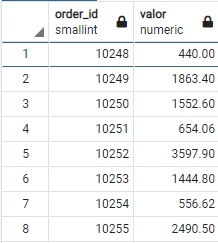

In [4]:
# Segunda parte: Organizar a vizualização final

    SELECT 
        employee_id as vendedor,
        to_char(order_date, 'YYYY-MM') as mes, 
        count(DISTINCT(orders.order_id)) as pedidos,
        SUM( count(DISTINCT(orders.order_id)) ) OVER( partition by  employee_id order by to_char(order_date, 'YYYY-MM')  )  AS pedidos_acumulado,
        SUM(od.valor) AS valor_pedidos,
        SUM( SUM(od.valor) ) OVER( partition by  employee_id order by to_char(order_date, 'YYYY-MM')  ) AS valor_acumulado
    FROM 
        orders
    INNER JOIN 
        od ON od.order_id = orders.order_id
    group by 
        employee_id, to_char(order_date, 'YYYY-MM')
    order by 
        employee_id, mes;

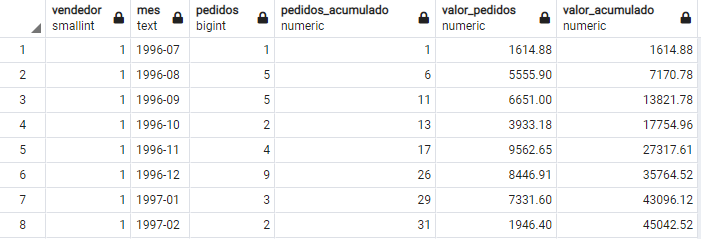

In [5]:
#Fim